In [53]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('missing').getOrCreate()


In [54]:
# Let's read in the data. If you open the dataset, you'll find that each column has a header. We specify that by stating that header=True.
# To make our lives easier, we can also use 'inferSchema' when importing CSVs. This automatically detects data types.
# If you would like to manually change data types, refer to this article: https://medium.com/@mrpowers/adding-structtype-columns-to-spark-dataframes-b44125409803
df = spark.read.csv('Datasets/Bank.csv',header=True,inferSchema=True)
bankdf=pd.read_csv('Datasets/Bank.csv')


In [56]:
# The show method allows you visualise DataFrames in a tabular format. 
df.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|Deposit|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0|     no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|        

In [57]:
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
# Print schema allows us to visualise the data structure at a high level. 
df.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points. 
# Note that we have to specify 'print' depending on the method we're using. Otherwise it may not show up!
print(df.head(2))

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- Deposit: string (nullable = true)

[Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day_of_

In [58]:
# We can use the describe method get some general statistics on our data too. 
df.select('Deposit').describe().show()

+-------+-------+
|summary|Deposit|
+-------+-------+
|  count|  41188|
|   mean|   null|
| stddev|   null|
|    min|     no|
|    max|    yes|
+-------+-------+



In [59]:
bankdf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41185.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567634,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770101,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [60]:
# Let's select the columns that are integers, and use the describe method again.
# We see that the average age is 41. The average bank account balance is $1,074. 
# And they spoke to call centre reps for approx. 931 seconds on average. 
df.select('age', 'contact', 'duration').describe().show()

+-------+------------------+---------+-----------------+
|summary|               age|  contact|         duration|
+-------+------------------+---------+-----------------+
|  count|             41188|    41188|            41188|
|   mean| 40.02406040594348|     null|258.2850101971448|
| stddev|10.421249980934043|     null| 259.279248836465|
|    min|                17| cellular|                0|
|    max|                98|telephone|             4918|
+-------+------------------+---------+-----------------+



In [ ]:
Pie Plot

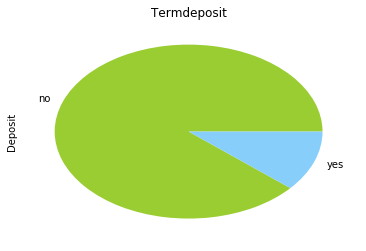

In [61]:
# plot data
colors = ['yellowgreen','lightskyblue']
bankdf['Deposit'].value_counts().plot(kind='pie',title='Termdeposit',colors=colors)
plt.show()

In [ ]:
Histogram

Text(0.5,0,'deposit')

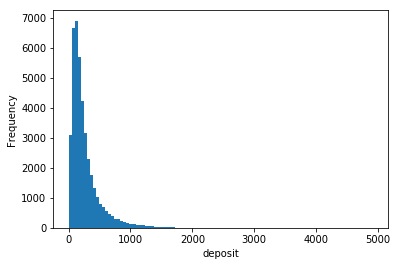

In [66]:
bankdf['duration'].plot(kind='hist',bins=100)
plt.xlabel('deposit')

In [ ]:
#Histogram

<Figure size 432x288 with 0 Axes>

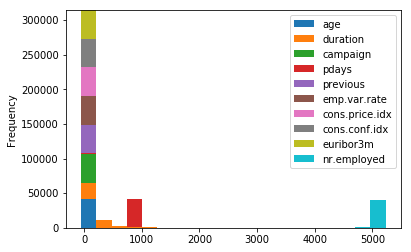

In [68]:
plt.figure();

bankdf.plot.hist(stacked=True, bins=20)

In [ ]:
Horizontal and cumulative histogram

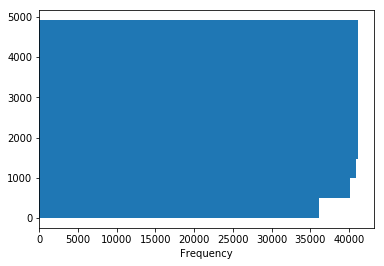

In [69]:
 plt.figure();
bankdf['duration'].plot.hist(orientation='horizontal', cumulative=True)

In [ ]:
#Boxplot

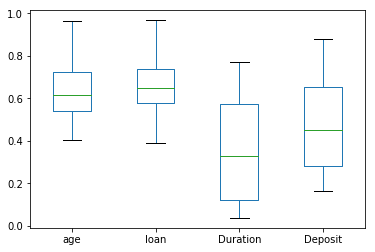

In [80]:

bankdf = pd.DataFrame(np.random.rand(4,4), columns=['age', 'loan', 'Duration', 'Deposit'])

bankdf.plot.box()

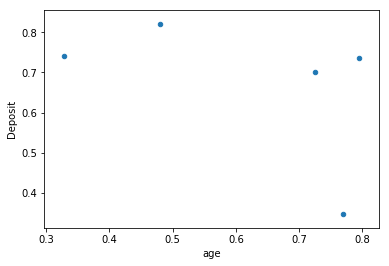

In [83]:
 bankdf = pd.DataFrame(np.random.rand(5, 5), columns=['age', 'loan', 'pdays', 'Deposit','duration'])

bankdf.plot.scatter(x='age', y='Deposit');

In [ ]:
#scatter plot

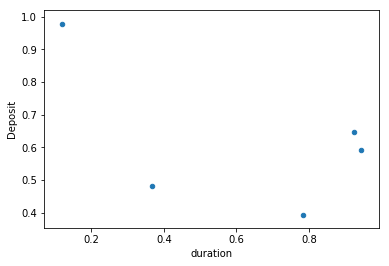

In [84]:
 bankdf = pd.DataFrame(np.random.rand(5, 5), columns=['age', 'loan', 'pdays', 'Deposit','duration'])

bankdf.plot.scatter(x='duration', y='Deposit');

In [95]:
print("Total data points:", df.count())
df.show()

Total data points: 41188
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|Deposit|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0|     no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|    

In [110]:
# For integer type features, you may want to replace the null value the average of that feature.
# Let's see how that's done using balance as an example.
from pyspark.sql.functions import mean

# Let's find the average. But the problem is, how do we get that information out of the DataFrame?
mean_campaign = df.select(mean('campaign')).show()


+-----------------+
|    avg(campaign)|
+-----------------+
|2.567633847274493|
+-----------------+



In [114]:
# Now, we can fill the missing values with the mean. 
# As the mean is 1074, you'll see 1074 instead of null in the balance column.
filled_df = filled_df.na.fill(mean_campaign, subset=['campaign'])
filled_df.show()

NameError: name 'filled_df' is not defined